In [45]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression

In [2]:
# read the data
train=pd.read_csv("Global_Landslide_Catalog_Export-Cleansed-New-4Rows.csv")

In [5]:
train.head(10)

,event_id,fatality_count,injury_count,country_name
0,684,11.0,NaN,China
1,956,0.0,NaN,United States
2,973,10.0,NaN,Peru
3,1067,1.0,NaN,Nepal
4,2603,0.0,NaN,Philippines
5,4203,0.0,NaN,Philippines
6,4290,0.0,NaN,United States
7,225,3.0,NaN,Mexico
8,236,NaN,NaN,United States
9,873,2.0,NaN,China


In [6]:
train.shape

(11033, 4)

In [7]:
train.describe()

,event_id,fatality_count,injury_count
count,11033.000000,9648.000000,5359.000000
mean,5598.953141,3.219424,0.751819
std,3249.228647,59.886178,8.458955
min,1.000000,0.000000,0.000000
25%,2785.000000,0.000000,0.000000
50%,5563.000000,0.000000,0.000000
75%,8435.000000,1.000000,0.000000
max,11221.000000,5000.000000,374.000000


In [8]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 4 columns):
event_id          11033 non-null int64
fatality_count    9648 non-null float64
injury_count      5359 non-null float64
country_name      9471 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 344.9+ KB
None


In [10]:
#preparing the data - preprocessing 

#look for any null values
train.isnull().sum()

event_id             0
fatality_count    1385
injury_count      5674
country_name      1562
dtype: int64

In [11]:
train = train.fillna(0)

In [12]:
#preparing the data - preprocessing 

#look for any null values
train.isnull().sum()

event_id          0
fatality_count    0
injury_count      0
country_name      0
dtype: int64

In [13]:
train.describe()

,event_id,fatality_count,injury_count
count,11033.000000,11033.000000,11033.000000
mean,5598.953141,2.815281,0.365177
std,3249.228647,56.011137,5.907061
min,1.000000,0.000000,0.000000
25%,2785.000000,0.000000,0.000000
50%,5563.000000,0.000000,0.000000
75%,8435.000000,0.000000,0.000000
max,11221.000000,5000.000000,374.000000


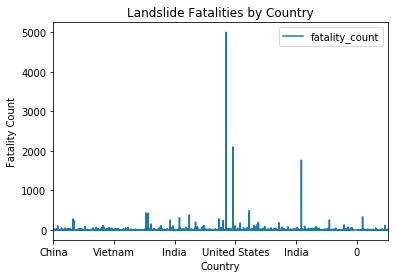

In [14]:
train.plot(x='country_name', y='fatality_count', style='-')
plt.title('Landslide Fatalities by Country')
plt.xlabel('Country')
plt.ylabel('Fatality Count')
plt.show()

In [16]:
correlation_matrix = train.corr().round(2)
print(correlation_matrix)

                event_id  fatality_count  injury_count
event_id            1.00           -0.02          0.04
fatality_count     -0.02            1.00          0.07
injury_count        0.04            0.07          1.00


Text(0, 0.5, 'Fatalty')

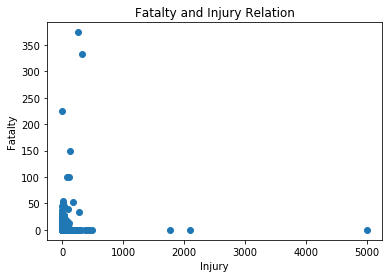

In [44]:
feature = train['fatality_count']
target = train['injury_count']
plt.scatter(feature,target, marker='o')
plt.title('Fatalty and Injury Relation')
plt.xlabel('Injury')
plt.ylabel('Fatalty')


In [18]:
#data for preparation
#we are taking only RM for demonstrating simple linear regression for more accurate results,
#multiple linear regression can also be considered

x=train[['injury_count']]
y=train['fatality_count']

In [21]:
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8826, 1)
(2207, 1)
(8826,)
(2207,)


In [22]:
#creating the linear regression model

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Dependent variable')

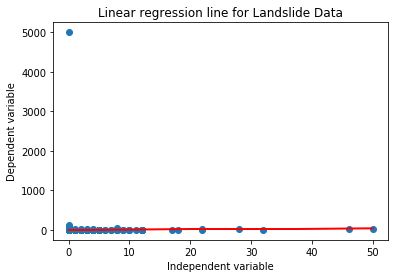

In [23]:
#get the predicted variables and plot the regression line

Y_pred = linear_model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color ='r')
plt.title("Linear regression line for Landslide Data")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

In [36]:
#performance of the linear model. Gives R2 score

print(linear_model.score(X_test, Y_test))

-0.00022469358417276375


In [25]:
print(mean_squared_error(Y_test,Y_pred))

11353.437495496484


In [39]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [41]:
print("Accuracy:",metrics.accuracy_score(X_test, Y_test))

Accuracy: 0.7657453556864522


In [47]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)

#
y_pred=logreg.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [49]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[1710,    1,    0, ...,    0,    0,    0],
       [ 110,    5,    0, ...,    0,    0,    0],
       [  89,    0,    0, ...,    0,    0,    0],
       ...,
       [   1,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0]])

In [57]:
score = logreg.score(X_test, Y_test)

In [58]:
print(score)

0.7770729497054826


We tried three algorithmns in our dataset which Linear Regression, Decisoin Tree and Logistic Regression. If we look at the accuracy scores we can see Logistic Regression model gives us the most accurate results. However accuracy score is very close between Decision Tree and Logistic Regression. 